In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import gc

In [3]:
sales_train = pd.read_csv('sales_train.csv')
items = pd.read_csv('items.csv')
item_cat = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [7]:
item_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [8]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [10]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [11]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [11]:
sales_train.item_cnt_day.sort_values(ascending=False)

2909818    2169.0
2326930    1000.0
2864235     669.0
2851091     637.0
2608040     624.0
            ...  
59156        -6.0
940092       -6.0
2048519      -9.0
1835454     -16.0
1057907     -22.0
Name: item_cnt_day, Length: 2935849, dtype: float64

In [12]:
sales_train['item_cnt_day'][sales_train['item_cnt_day']>=1000] = 0
sales_train['item_cnt_day'][sales_train['item_cnt_day']<0] = 0

C:\Users\shiju\AppData\Local\Temp/ipykernel_18312/2693003345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train['item_cnt_day'][sales_train['item_cnt_day']>=1000] = 0
C:\Users\shiju\AppData\Local\Temp/ipykernel_18312/2693003345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train['item_cnt_day'][sales_train['item_cnt_day']<0] = 0


In [36]:
from datetime import date
date_range_ = pd.date_range(date(2013,1,31),periods=len(pd.unique(sales_train['date_block_num'])), freq='M')

In [40]:
date_range_

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [37]:
dict_ = dict(zip(pd.unique(sales_train['date_block_num']), date_range_))

In [43]:
sales_train['time'] = sales_train['date_block_num'].map(dict_)

## EDA

In [45]:
sales_train['date'] = pd.to_datetime(sales_train['date'],format="%d.%m.%Y")

group_by_shop_item_monthly = sales_train.groupby(by=['shop_id', 'item_id', 'time', 'item_price']).agg(
    {'item_cnt_day' : 'sum'}
).reset_index()

In [46]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,time
0,2013-01-02,0,59,22154,999.00,1.0,2013-01-31
1,2013-01-03,0,25,2552,899.00,1.0,2013-01-31
2,2013-01-05,0,25,2552,899.00,0.0,2013-01-31
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01-31
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01-31
5,2013-01-10,0,25,2564,349.00,1.0,2013-01-31
6,2013-01-02,0,25,2565,549.00,1.0,2013-01-31
7,2013-01-04,0,25,2572,239.00,1.0,2013-01-31
8,2013-01-11,0,25,2572,299.00,1.0,2013-01-31
9,2013-01-03,0,25,2573,299.00,3.0,2013-01-31


In [16]:
group_by_shop_item_monthly.head()

,shop_id,item_id,date_block_num,item_price,item_cnt_day
0,0,30,1,265.0,31.0
1,0,31,1,434.0,11.0
2,0,32,0,221.0,6.0
3,0,32,1,221.0,10.0
4,0,33,0,347.0,3.0


In [17]:
print('Numbers of item in data set is : ', group_by_shop_item_monthly['item_id'].nunique())
print('Numbers of shop in data set is : ',group_by_shop_item_monthly['shop_id'].nunique())

Numbers of item in data set is :  21807
Numbers of shop in data set is :  60


30223

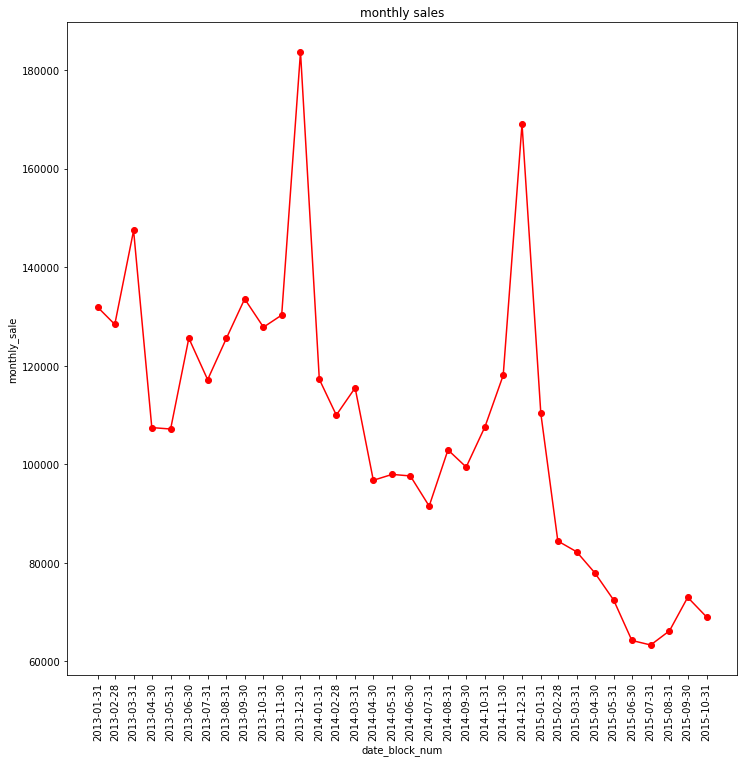

In [58]:
#sales every month
#sales of each item
#sales of each shop
#sales of each category
monthly_sale = group_by_shop_item_monthly.groupby(by='time')['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(12, 12))
plt.plot(monthly_sale['time'], monthly_sale['item_cnt_day'], color='red', marker='o')
plt.xticks(monthly_sale['time'], rotation=90)
plt.xlabel('date_block_num')
plt.ylabel('monthly_sale')
plt.title('monthly sales')

gc.collect()

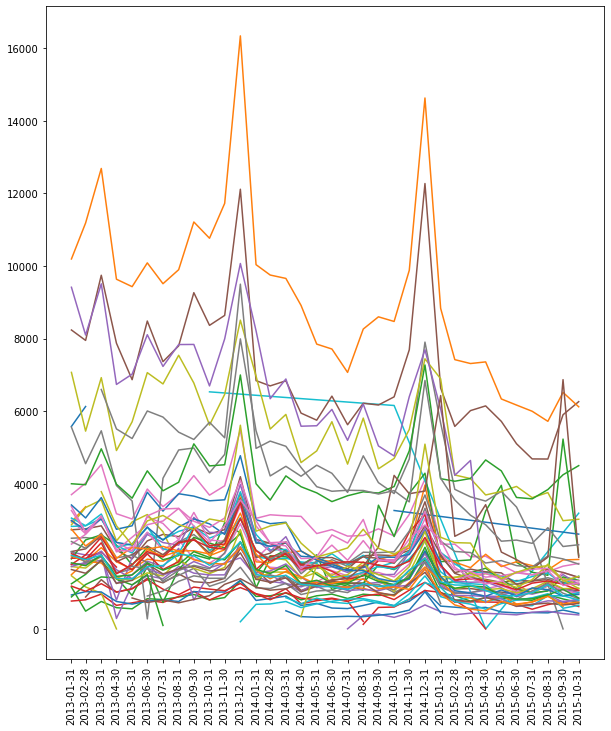

In [52]:
shop_sale = group_by_shop_item_monthly.groupby(by=['shop_id', 'time'])['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(10, 12))
for shop_id in shop_sale['shop_id'].unique():
    subset = shop_sale[shop_sale['shop_id'] == shop_id]
    plt.plot(subset['time'], subset['item_cnt_day'], label = 'shop' + str(shop_id))
    plt.xticks(subset['time'], rotation=90)
#plt.legend()

plt.savefig("shop sales monthly.svg", format="svg")

In [20]:
# Sales in two month are extremely high, find out what happens in that two months
two_months = shop_sale[['item_cnt_day','date_block_num']].sort_values(by='item_cnt_day', ascending=False)[:2]['date_block_num'].values
print(two_months)

[11 23]


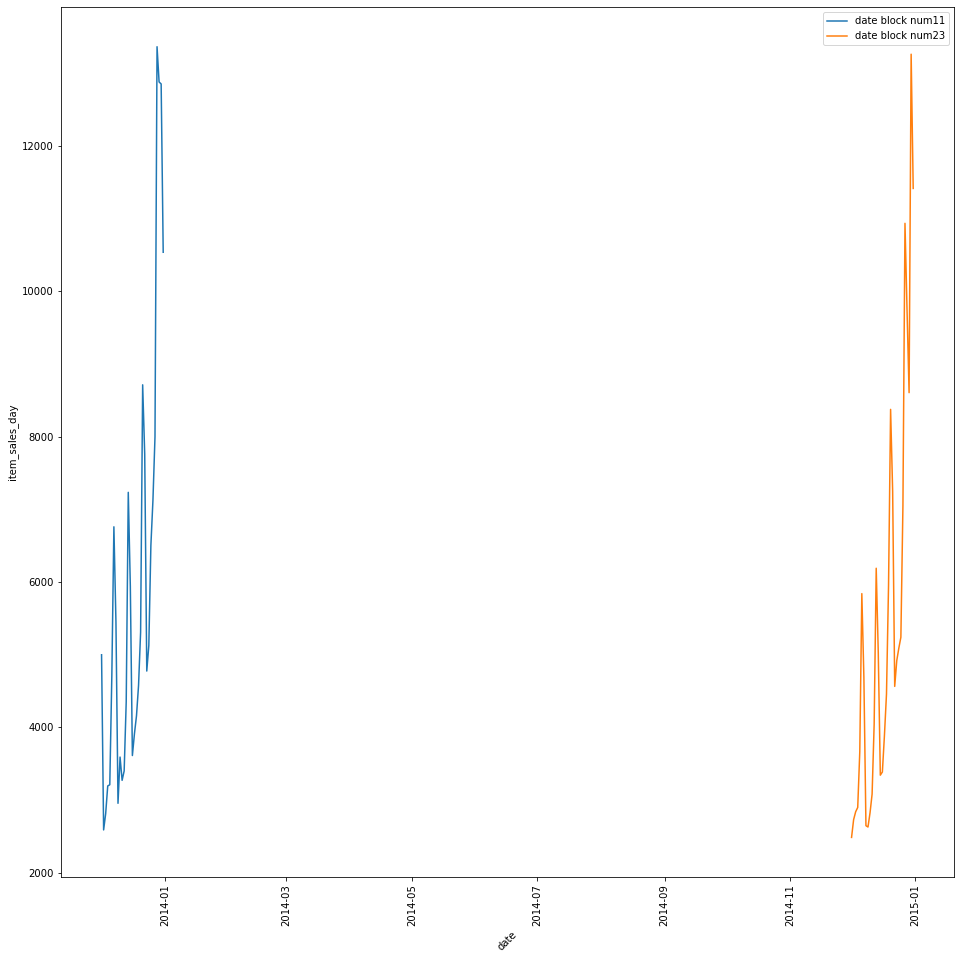

In [21]:
#group by date

daily_sales = sales_train.groupby(by=['date_block_num', 'date'])['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(16,16))
for date_block in two_months:
    df_sub = daily_sales[daily_sales['date_block_num'] == date_block]
    plt.plot(df_sub['date'], df_sub['item_cnt_day'], label = 'date block num' + str(date_block))
    plt.xticks(rotation=90)
    plt.xlabel("date", rotation=45)
    plt.ylabel("item_sales_day")
    
plt.legend()
plt.savefig(str(date_block) + "extreme_monthly_sale.svg", format='svg')

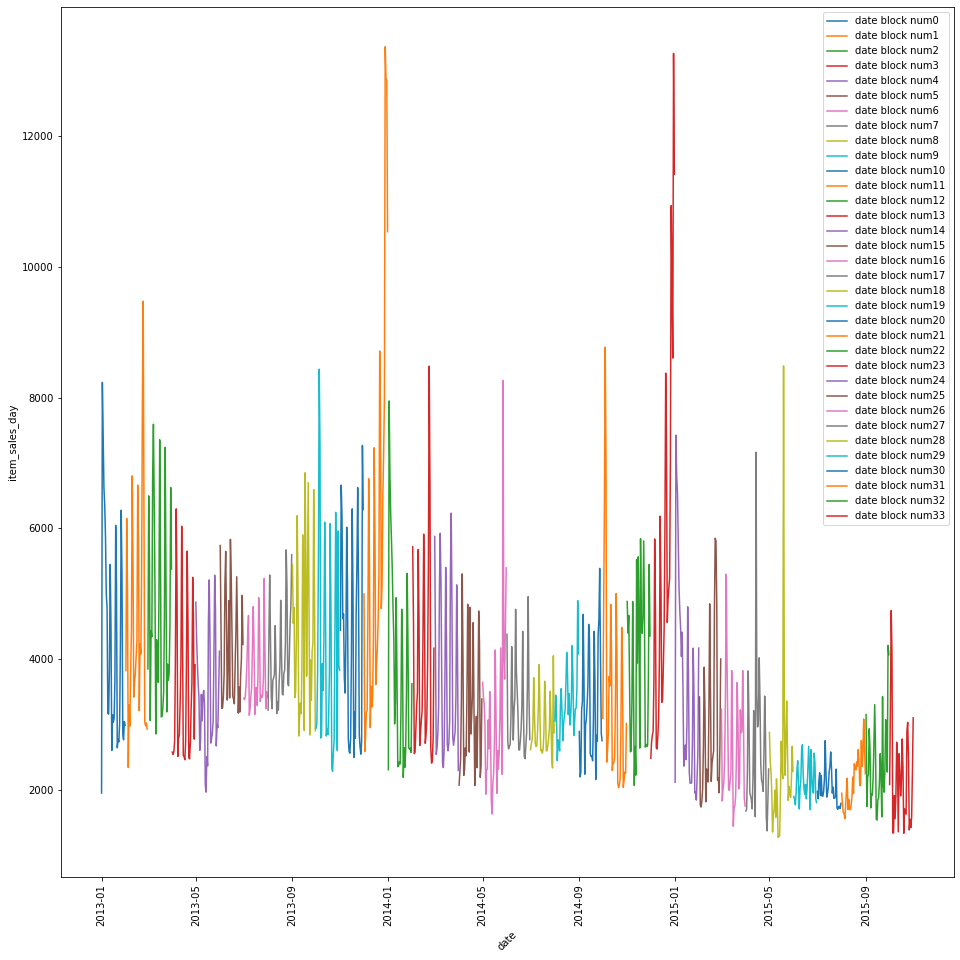

In [22]:
daily_sales = sales_train.groupby(by=['date_block_num', 'date'])['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(16,16))
for date_block in sales_train['date_block_num'].unique():
    df_sub = daily_sales[daily_sales['date_block_num'] == date_block]
    plt.plot(df_sub['date'], df_sub['item_cnt_day'], label = 'date block num' + str(date_block))
    plt.xticks(rotation=90)
    plt.xlabel("date", rotation=45)
    plt.ylabel("item_sales_day")
    
plt.legend()
plt.savefig(str(date_block) + "monthly_sale.svg", format='svg')

In [23]:
#select 30 shops
from itertools import product

#combine = list(product(group_by_shop_item_monthly['item_id'], group_by_shop_item_monthly['shop_id']))

In [24]:
sales_train.item_id.nunique()

21807

In [25]:
import random

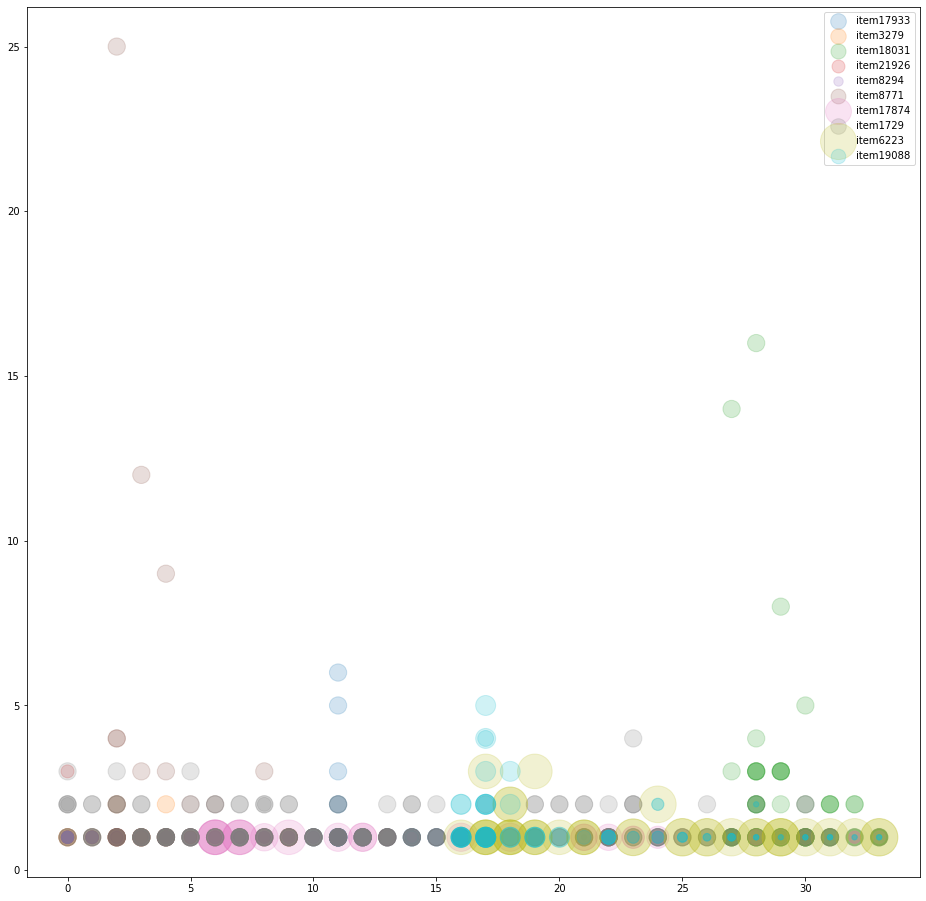

In [26]:
np.random.seed(12)
plt.figure(figsize=(16,16))
monthly_train = sales_train.groupby(by=['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum', 'item_price': 'mean'}).reset_index()
for item_id in sales_train['item_id'].unique()[np.random.choice(len(sales_train['item_id'].unique()), size=10)]:
    subset = monthly_train[monthly_train['item_id'] == item_id]
    plt.scatter(subset['date_block_num'], subset['item_cnt_day'],s=subset['item_price'] ,alpha=0.2 ,label = 'item' + str(item_id))

plt.legend()
plt.savefig("several_items.svg", format="svg")

In [27]:
from datetime import date
date_range_ = pd.date_range(date(2013,1,31),periods=len(pd.unique(sales_train['date_block_num'])), freq='M')

In [30]:
date_range_

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [60]:
df_2013 = monthly_sale[monthly_sale['time'].dt.year==2013]

df_2014 = monthly_sale[monthly_sale['time'].dt.year==2014]
df_2015 = monthly_sale[monthly_sale['time'].dt.year==2015]

fig, axes = plt.subplots(1,3 , sharey=True, figsize=(20, 20))
dfs = [df_2013, df_2014, df_2015]
for i in range(3):
    axes[i].plot(dfs[i].time, dfs[i].item_cnt_day)
    axes[i].set_xticks(dfs[i].time)
    axes[i].set_xticklabels(dfs[i].time, rotation=90)
    axes[i].set_title(str(2013+i))

In [74]:
##sales of some items

item_sales = group_by_shop_item_monthly.groupby(by=['item_id', 'time'])['item_cnt_day'].sum().reset_index().sort_values(by='item_cnt_day')
item_sales

,item_id,time,item_cnt_day
139885,13501,2013-01-31,0.0
156344,14915,2014-01-31,0.0
44115,4599,2014-02-28,0.0
13491,1593,2013-02-28,0.0
8577,1081,2013-06-30,0.0
...,...,...,...
222756,20949,2013-09-30,7945.0
222753,20949,2013-06-30,8424.0
222758,20949,2013-11-30,8537.0
222771,20949,2014-12-31,12185.0


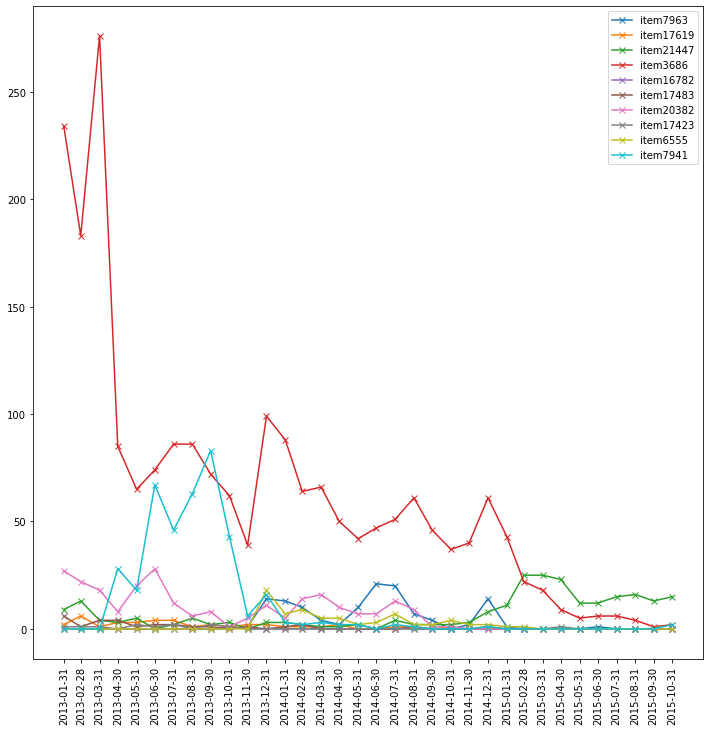

In [78]:
import random
np.random.seed(114514)
plt.figure(figsize=(12,12))
for i in range(10):
    item = random.choice(pd.unique(item_sales['item_id']))
    subset = item_sales[item_sales['item_id'] == item]
    subset = subset.set_index('time').reindex(pd.unique(sales_train['time'])).fillna(0)
    plt.plot(subset.index, subset['item_cnt_day'], marker='x', label='item'+ str(item))

plt.xticks(pd.unique(item_sales['time']), rotation=90)
plt.legend()

In [82]:
### Trend of top 10 and tail 10 items

items_merged = item_sales.groupby(by='item_id')['item_cnt_day'].sum().sort_values()
top_10 = items_merged[-10:-1].index
tail_10 = items_merged[:10].index

In [83]:
top_10

Int64Index([16787, 1855, 3731, 6675, 3734, 5822, 17717, 3732, 2808], dtype='int64', name='item_id')

In [84]:
tail_10

Int64Index([18062, 11871, 13474, 0, 7151, 7153, 7158, 7160, 7163, 7167], dtype='int64', name='item_id')

In [86]:
top_tail = np.concatenate((np.array(top_10), np.array(tail_10)), axis=0)

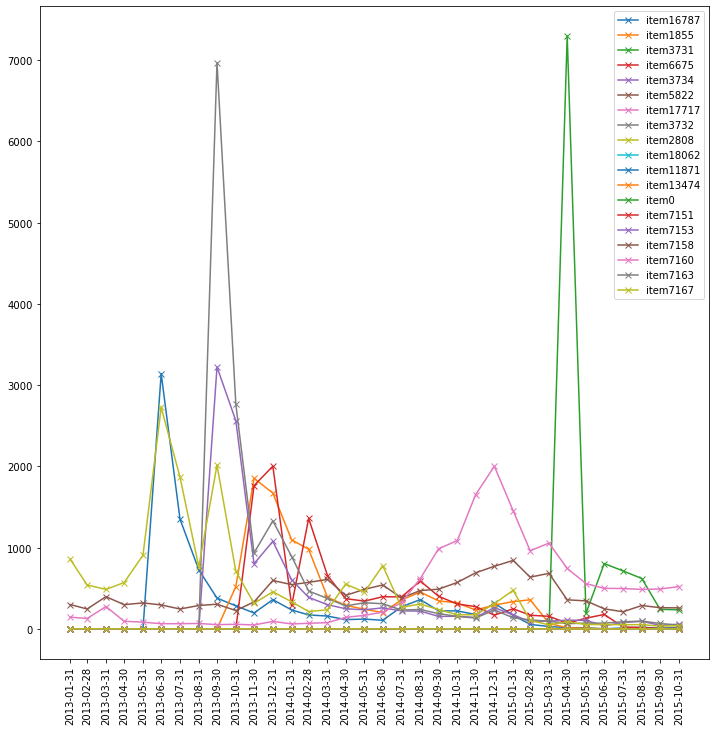

In [89]:
plt.figure(figsize=(12,12))
for item_id in top_tail:
    subset = item_sales[item_sales['item_id'] == item_id]
    subset = subset.set_index('time').reindex(pd.unique(sales_train['time'])).fillna(0)
    plt.plot(subset.index, subset['item_cnt_day'], marker='x', label='item'+ str(item_id))

plt.xticks(pd.unique(item_sales['time']), rotation=90)
plt.legend()

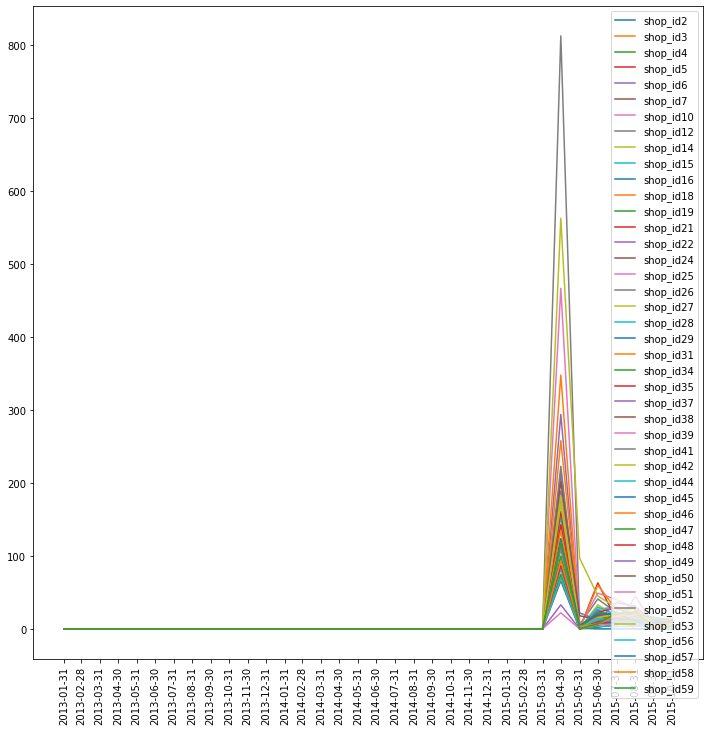

In [96]:
## select one item and show trends in different shops
item_3731 = group_by_shop_item_monthly[group_by_shop_item_monthly['item_id'] == 3731]
trend = item_3731.groupby(by=['shop_id', 'time'])['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(12,12))
for shop_id in pd.unique(trend['shop_id']):
    subset = trend[trend['shop_id'] == shop_id]
    subset = subset.set_index(subset['time']).reindex(pd.unique(sales_train['time'])).fillna(0)
    plt.plot(subset.index, subset['item_cnt_day'], label='shop_id' + str(shop_id))
plt.xticks(subset.index, rotation=90)
plt.legend(loc='best')

In [98]:
def plot_item(item_id):
    item_ = group_by_shop_item_monthly[group_by_shop_item_monthly['item_id'] == item_id]
    trend = item_.groupby(by=['shop_id', 'time'])['item_cnt_day'].sum().reset_index()
    plt.figure(figsize=(12,12))
    for shop_id in pd.unique(trend['shop_id']):
        subset = trend[trend['shop_id'] == shop_id]
        subset = subset.set_index(subset['time']).reindex(pd.unique(sales_train['time'])).fillna(0)
        plt.plot(subset.index, subset['item_cnt_day'], label='shop_id' + str(shop_id))
    plt.xticks(subset.index, rotation=90)
    plt.legend(loc='best')

In [99]:
top_tail

array([16787,  1855,  3731,  6675,  3734,  5822, 17717,  3732,  2808,
       18062, 11871, 13474,     0,  7151,  7153,  7158,  7160,  7163,
        7167], dtype=int64)

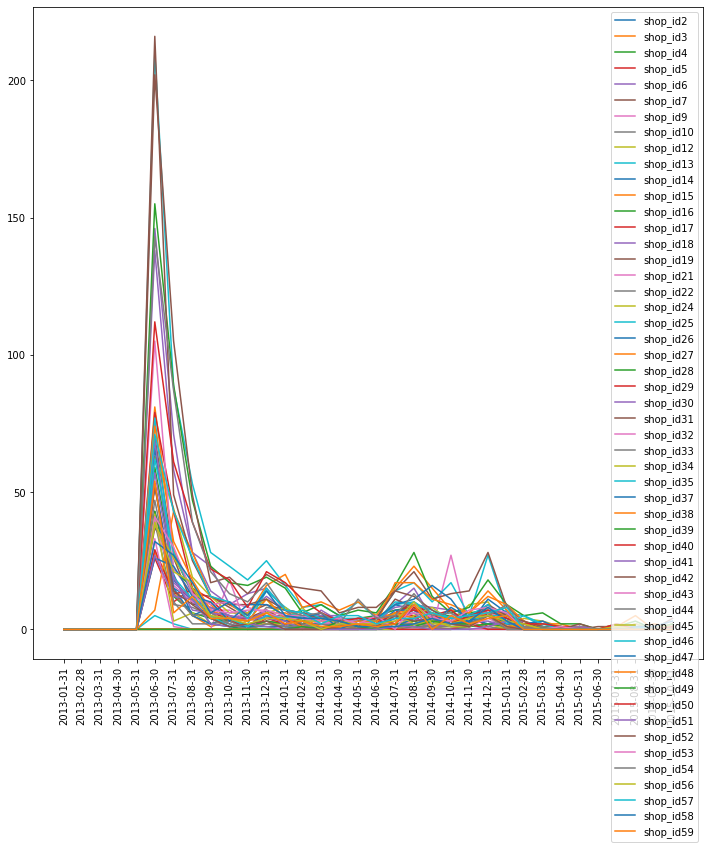

In [100]:
plot_item(top_tail[0])

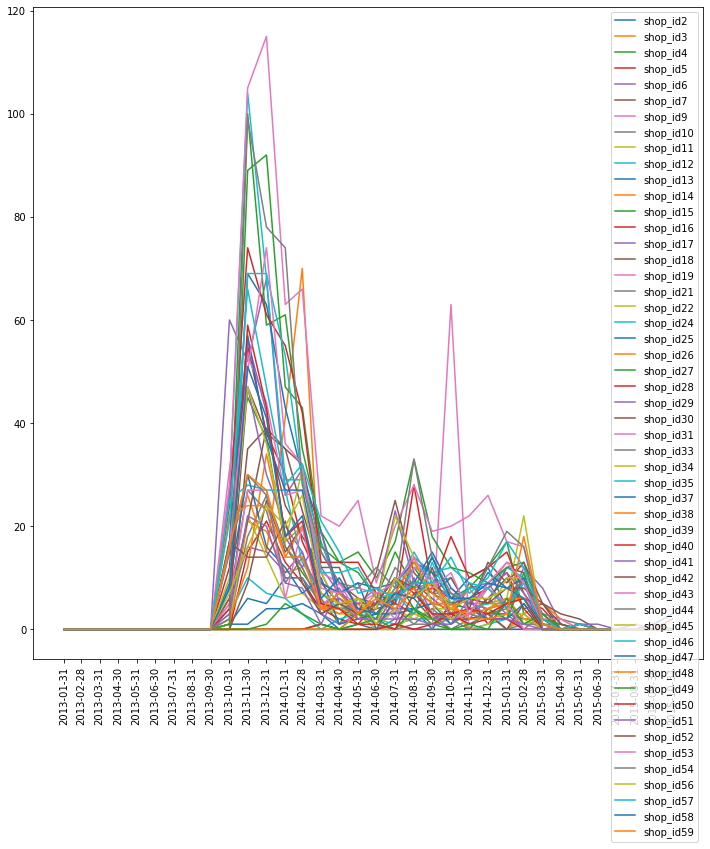

In [101]:
plot_item(top_tail[1])

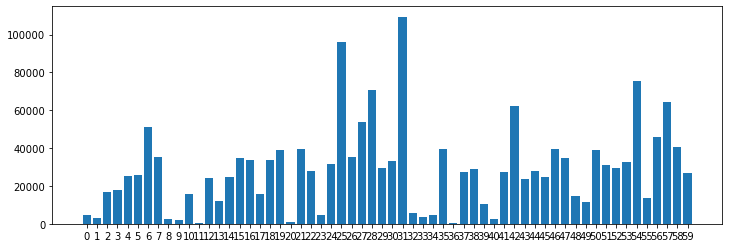

In [109]:
## distribution of shops

shop_count = group_by_shop_item_monthly.groupby(by='shop_id')['item_cnt_day'].count().reset_index().rename({
    'item_cnt_day': 'count'
})

plt.figure(figsize=(12, 4))
plt.bar(shop_count['shop_id'], shop_count['item_cnt_day'])
plt.xticks(pd.unique(shop_count['shop_id']))
plt.show()

In [110]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
